# Marketing Expense Optimization

The aim of this report is to analyze data provided to find the most reliable way to optimize marketing expenses.

We will study in detail how people use the product, their first purchase, the revenue per customer and when are their payments complete.

This report is structured as follows:

**Table of Contents**

* [1. Downloading and Optimizing Data](#chapter1)
* [2. Reports and Metrics](#chapter2)
    * [2.1 Product](#section_2_1)
    * [2.2 Sales](#section_2_2)
    * [2.3 Marketing](#section_2_3)
* [3. Conclusion](#chapter3)

## 1. Downloading and Optimizing Data  <a class="anchor" id="chapter1"></a>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\rando\anaconda3\lib\site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [165]:
pip install numpy==1.16.5

  Using cached numpy-1.16.5.zip (5.1 MB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
    Running setup.py install for numpy: started
    Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\rando\anaconda3\lib\site-packages\numpy-1.19.2.dist-info\
   from C:\Users\rando\anaconda3\Lib\site-packages\~umpy-1.19.2.dist-info
  Moving to c:\users\rando\anaconda3\lib\site-packages\numpy\
   from C:\Users\rando\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\rando\anaconda3\scripts\f2py-script.py
   from C:\Users\rando\AppData\Local\Temp\pip-uninstall-v2iqf89q\f2py-script.py
  Moving to c:\users\rando\anaconda3\scripts\f2py.exe
   from C:\Users\rando\AppData\Local\Temp\pip-uninstall-v2iqf89q\f2py.exe
Note: you may need to restart the kernel to use updated pack

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rando\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rando\\AppData\\Local\\Temp\\pip-install-fvyp_c_h\\numpy\\setup.py'"'"'; __file__='"'"'C:\\Users\\rando\\AppData\\Local\\Temp\\pip-install-fvyp_c_h\\numpy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\rando\AppData\Local\Temp\pip-wheel-v9sykl6e'
       cwd: C:\Users\rando\AppData\Local\Temp\pip-install-fvyp_c_h\numpy\
  Complete output (264 lines):
  Running from numpy source directory.
  C:\Users\rando\AppData\Local\Temp\pip-install-fvyp_c_h\numpy\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler

  creating build\src.win-amd64-3.8
  creating build\src.win-amd64-3.8\numpy
  creating build\src.win-amd64-3.8\numpy\distutils
  building library "npymath" sources
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for numpy
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rando\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rando\\AppData\\Local\\Temp\\pip-install-fvyp_c_h\\numpy\\setup.py'"'"'; __file__='"'"'C:\\Users\\rando\\AppData\\Local\\Temp\\pip-install-fvyp_c_h\\numpy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' 

We have been provided with 3 datasets, containing the following data:
* Visits: server logs with data on website visits.
* Orders: data on orders.
* Costs: data on Marketing expenses.

We will begin with data optimization. This step will optimize the memory usage by applying the right data types to each field (column). In order to do so, we will download just 500 rows to be able to find the best data type.

Once adjusted, we will download the full datasets with the corrected data types.

In [166]:
visits = pd.read_csv(r'D:/Practicum100/Datasets/visits_log_us.csv', nrows=500)

In [167]:
orders = pd.read_csv(r'D:/Practicum100/Datasets/orders_log_us.csv', nrows=500)

In [168]:
costs = pd.read_csv(r'D:/Practicum100/Datasets/costs_us.csv', nrows=500) 

**Optimizing Visits Dataframe**

In [169]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [170]:
#Converting Device field to Category data type
visits['Device'] = visits['Device'].astype('category') 

In [171]:
#Converting date fields to datetime data type
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [172]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.4 KB


In [173]:
#Download full visits df with corrected data types.
visits = pd.read_csv(r'D:/Practicum100/Datasets/visits_log_us.csv', 
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])

In [174]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [175]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [176]:
visits.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


**Optimizing Orders Dataframe**

In [177]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [178]:
orders['Buy Ts'].value_counts()

2017-06-05 22:24:00    3
2017-06-05 16:36:00    2
2017-06-05 10:33:00    2
2017-06-03 11:01:00    2
2017-06-05 12:47:00    2
                      ..
2017-06-01 17:09:00    1
2017-06-04 01:46:00    1
2017-06-05 20:38:00    1
2017-06-05 09:35:00    1
2017-06-01 21:52:00    1
Name: Buy Ts, Length: 476, dtype: int64

In [179]:
#Converting date fields to datetime data type
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [180]:
#Download full orders df with corrected data types.
orders = pd.read_csv(r'D:/Practicum100/Datasets/orders_log_us.csv',
                  parse_dates=['Buy Ts'])

In [181]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [182]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [183]:
orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


**Optimizing Costs Dataframe**

In [184]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [185]:
#Converting date fields to datetime data type
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")

In [186]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


In [187]:
#Download full costs df with corrected data types.
costs = pd.read_csv(r'D:/Practicum100/Datasets/costs_us.csv',
                  parse_dates=['dt'])


In [188]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [189]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [190]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


**Visit Headers**

In [191]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ','_')

In [192]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Checking if session dates are within time frame specified in Project Description:

In [193]:
visits['end_ts'].min()

Timestamp('2017-06-01 00:02:00')

In [194]:
visits['end_ts'].max()

Timestamp('2018-06-01 01:26:00')

**Orders Headers**

In [195]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ','_')

In [196]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**Checking for Duplicates**

In [197]:
visits.duplicated().sum()

0

In [198]:
orders.duplicated().sum()

0

In [199]:
costs.duplicated().sum()

0

**Conclusion**
We have downloaded the 3 datasets:
* Visits:
    * largest dataframe 
    * 359400 entries
    * shares "Source Id" field with Costs df.
    * shares "Uid" field with Orders df.
* Orders:
    * 50415 entries
    * Revenue values range from 0 to over 2600 (although 75% of values are below 5).
* Costs:
    * 2542 entries
    * Source Id ranges from 1 to 10
    * Costs contains very spread values (min is 0.54 and max is 1788)

We have lower-cased all df, and no duplicates were found.
We have also ensured that the sessions start and end dates are within the timeframe specified by the project description.

## 2. Reports and Metrics <a class="anchor" id="chapter2"></a>

### 2.1 Product <a class="anchor" id="section_2_1"></a>

**How many people use it every day, week, and month?**

Let's analyze how many active users there are per day, week and month.

In [200]:
#1. Create new columns (daily, weekly, monthly)
visits['date']=visits['start_ts'].dt.date
visits['week']=visits['start_ts'].astype('datetime64[W]')
visits['month']=visits['start_ts'].astype('datetime64[M]')
visits['year']=visits['start_ts'].astype('datetime64[Y]')

In [201]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01


Now let's calculate metrics. We'll group the data by session date/week and find the means:

In [202]:
#We group by unique users, as some users might have used the product a few times within each time period.
dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total))
print(int(mau_total)) 

907
5621
23228


On average, there are 907 active users per day, 5621 active users per week, and 23228 active users per month.

Let's calculate DAU, WAU and MAU for each period and plot them in a graph to get a visual of how these variables evolve over time.

**Days**

In [203]:
dau_pivot = visits.pivot_table(index='date', values='uid', aggfunc={'uid':'nunique'})

#Dates with highest number of active users
dau_pivot.sort_values(by='uid', ascending=False).head()

,uid
date,
2017-11-24,3319
2018-05-31,1997
2017-11-25,1817
2018-02-01,1640
2018-03-26,1609


In [204]:
#Dates with lowest number of active users
dau_pivot.sort_values(by='uid', ascending=False).tail()

,uid
date,
2017-08-13,281
2017-08-05,280
2017-08-12,271
2018-03-30,131
2018-03-31,1


**Weeks**

In [205]:
wau_pivot = visits.pivot_table(index='week', values='uid', aggfunc={'uid':'nunique'})
#Weeks with highest number of active users
wau_pivot.sort_values(by='uid', ascending=False).head()

,uid
week,
2017-11-23,10716
2017-12-07,8575
2018-03-22,8486
2017-11-16,8294
2018-02-08,8218


In [206]:
#Weeks with lowest number of active users
wau_pivot.sort_values(by='uid', ascending=False).tail()

,uid
week,
2017-06-15,2844
2017-08-10,2658
2017-07-27,2505
2017-08-03,2343
2018-05-31,1997


**Months**

In [207]:
mau_pivot = visits.pivot_table(index='month', values='uid', aggfunc={'uid':'nunique'})
#Months with highest number of active users
mau_pivot.sort_values(by='uid', ascending=False).head()

,uid
month,
2017-11-01,32797
2017-12-01,31557
2017-10-01,29692
2018-02-01,28749
2018-01-01,28716


In [208]:
#Months with lowest number of active users
mau_pivot.sort_values(by='uid', ascending=False).tail()

,uid
month,
2018-05-01,20701
2017-09-01,18975
2017-07-01,14183
2017-06-01,13259
2017-08-01,11631


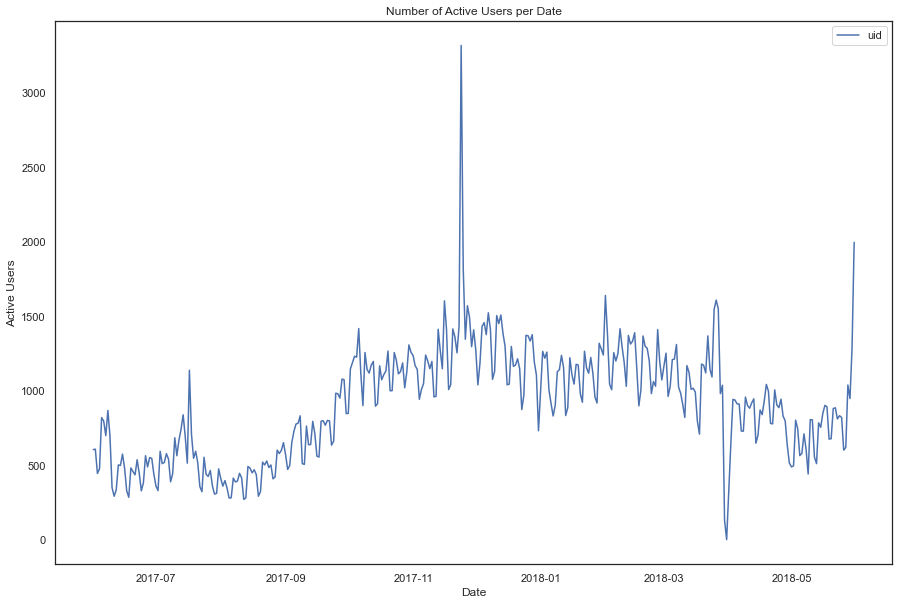

In [209]:
#DAU Lined Graph
dau_pivot.plot(figsize=(15,10));
plt.xlabel('Date')
plt.ylabel('Active Users')
plt.title('Number of Active Users per Date')
plt.show()

At first sight we can already see a 2 major peaks. The biggest one is on the 24th of November 2017 with 3319 unique active users - Black Friday probably had a big influence in this behavior, and made customers use the Marketing channels to engage with the website or app.

The lowest point was on March 31st, with only 1 active user! This  is an outlier, as the second lowest date (which is actually the previous) has 131 active users. This could be due to an error in accessing the app for example, due to a server crash or other technical issues. It is quite a coincidence otherwise that only 1 user accesses the app. Let's look at the Weekly numbers.

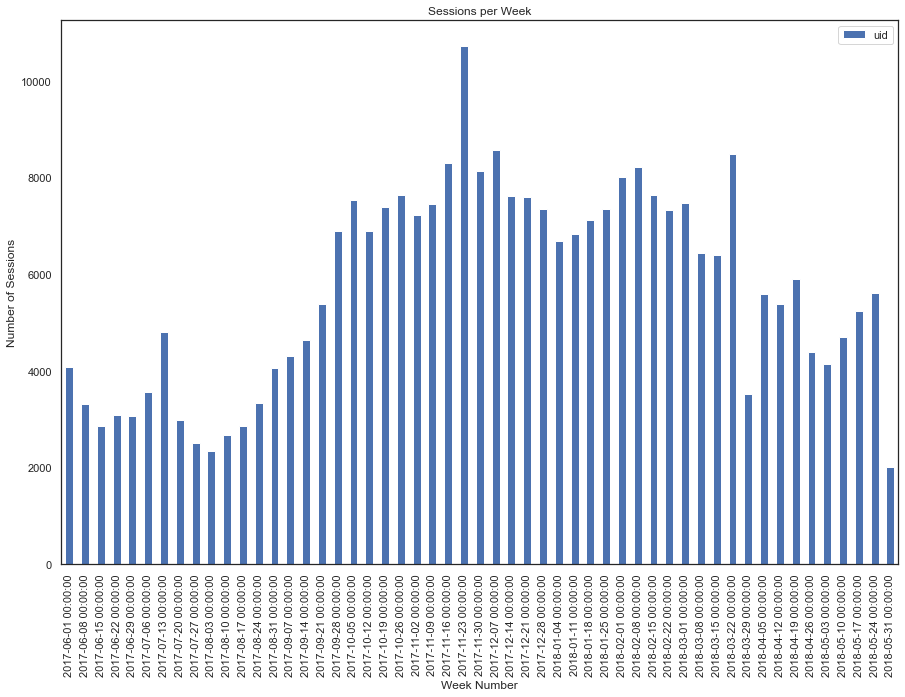

In [210]:
#WAU Bar Graph
wau_pivot.plot(kind='bar', figsize=(15,10));
plt.xlabel('Week Number')
plt.ylabel('Number of Sessions')
plt.title('Sessions per Week')
plt.show()

The highest number of active users is reached in week 47, with a total of 10586! This coincidences with the dates period (end of November). The lowest point is in week 31, with 2364 active users. This last one is the first week of August. People are probably on their summer holidays and are probably not attracted to buying new products.

<ipython-input-211-cbbc19ea0d99>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visit_reviewer['week']=visits['start_ts'].dt.week


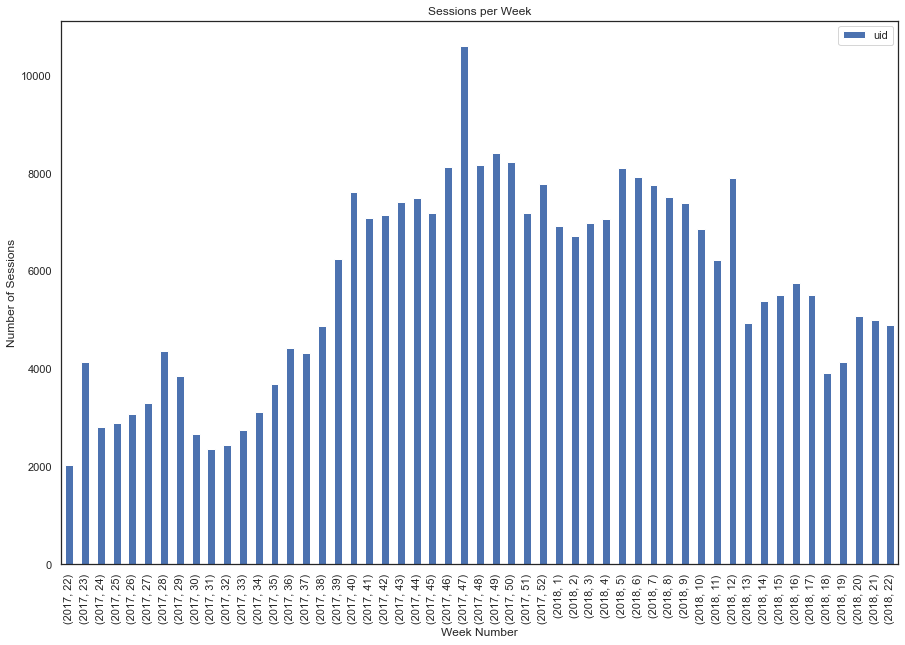

In [211]:
visit_reviewer = visits.copy()

visit_reviewer['date']=visits['start_ts'].dt.date
visit_reviewer['week']=visits['start_ts'].dt.week
visit_reviewer['month']=visits['start_ts'].dt.month
visit_reviewer['year']=visits['start_ts'].dt.year

#WAU Bar Graph
wau_pivot_2 = visit_reviewer.pivot_table(index=('year','week'), values='uid', aggfunc={'uid':'nunique'})
wau_pivot_2.plot(kind='bar', figsize=(15,10));
plt.xlabel('Week Number')
plt.ylabel('Number of Sessions')
plt.title('Sessions per Week')
plt.show()

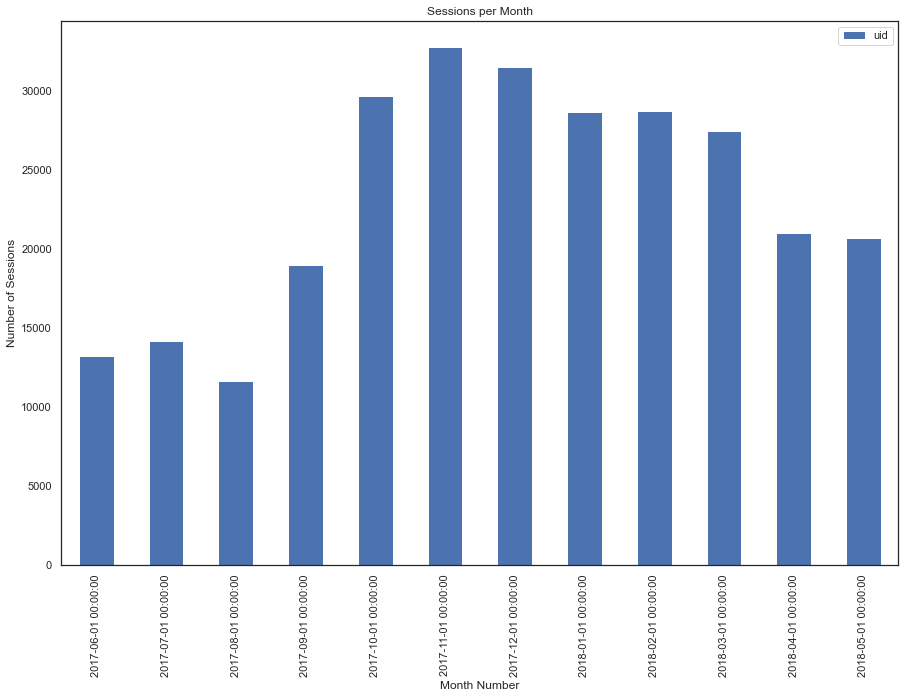

In [212]:
#MAU Bar Graph
mau_pivot.plot(kind='bar', figsize=(15,10));
plt.xlabel('Month Number')
plt.ylabel('Number of Sessions')
plt.title('Sessions per Month')
plt.show()

Finally, if we check the active users by month, the most active ones are November and December, whereas the least one is August. This gives more weight to what we mentioned before; Christmas and Summer Holidays could have an impact.

**How many sessions are there per day? (One user might have more than one session.)**

This is a similar approach to what we calculated previously, but this time we don't need to take into account unique users. We are talking about total sessions per day, regardless how many times users repeated. Each session is counted.

In [213]:
daily_sessions = visits.groupby('date').agg({'uid': 'count'}).mean()
daily_sessions.round()

uid    987.0
dtype: float64

On average, there are 987 sessions per day.

Let's compare this with the daily active users (where we had to take into account "unique" users).

In [214]:
daily_sessions_pivot = visits.pivot_table(index='date', values='uid', aggfunc={'uid':'count'})

#Dates with highest number of sessions
daily_sessions_pivot.sort_values(by='uid', ascending=False).head()

,uid
date,
2017-11-24,4042
2018-05-31,2256
2017-11-25,2089
2018-02-01,1878
2018-03-26,1796


In [215]:
dau_pivot.columns=['Active Users']

In [216]:
daily_sessions_pivot.columns=['Daily Sessions']

In [217]:
dates = daily_sessions_pivot.join(dau_pivot, on='date')

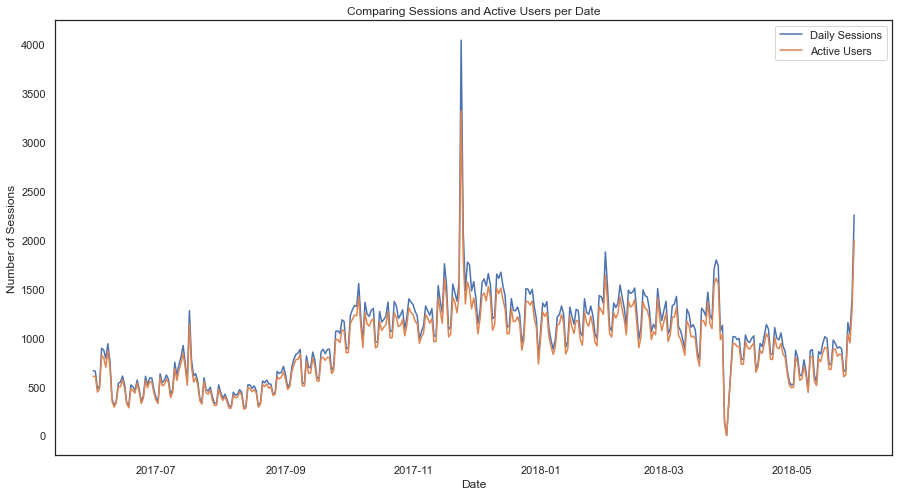

In [218]:
#Daily Sessions Lined Graph
dates.plot(figsize=(15,8));
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.title('Comparing Sessions and Active Users per Date')
plt.show()

Sessions per day and Active users per Day (DAU) have almost equal dynamics over time. Some users repeat sessions. The biggest difference is in the highest peak, on November 24 2017. 
* Number of sessions is: 4042
* DAU: 3319

In [219]:
dates['avg sessions per user'] = (dates['Daily Sessions']/dates['Active Users']).round(2)
dates.sort_values(by='avg sessions per user', ascending=False).head()

,Daily Sessions,Active Users,avg sessions per user
date,,,
2017-11-24,4042,3319,1.22
2017-11-28,1746,1493,1.17
2018-02-01,1878,1640,1.15
2017-11-25,2089,1817,1.15
2017-11-29,1480,1296,1.14


Dates with the highest average sessions per user are displayed in the table above. 

4 out of the top 5 are within the last week of November, so some users kept checking in, maybe checking on offers; Black Friday or Cyper Monday perhaps?

The overall average session per user per day is 1.08. Most users enter just once per day, while very few tend to come back within the same day.

**What is the length of each session?**

In [220]:
visits['session_length'] = visits['end_ts']-visits['start_ts']

In [221]:
#Average session length over time
visits.describe()

,source_id,uid,session_length
count,359400.000000,3.594000e+05,359400
mean,3.750515,9.202557e+18,0 days 00:10:43.025687256
std,1.917116,5.298433e+18,0 days 00:16:37.127760516
min,1.000000,1.186350e+13,-1 days +23:14:00
25%,3.000000,4.613407e+18,0 days 00:02:00
50%,4.000000,9.227413e+18,0 days 00:05:00
75%,5.000000,1.372824e+19,0 days 00:14:00
max,10.000000,1.844668e+19,0 days 11:51:00


In [222]:
visits.sort_values(by='session_length', ascending=True).head(5)

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_length
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-22,2018-03-01,2018-01-01,-1 days +23:14:00
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-22,2018-03-01,2018-01-01,-1 days +23:28:00
141593,desktop,2018-01-25 20:55:00,4,2018-01-25 20:55:00,6885023040148462867,2018-01-25,2018-01-25,2018-01-01,2018-01-01,0 days 00:00:00
251174,desktop,2018-02-08 15:35:00,3,2018-02-08 15:35:00,6843418812504165819,2018-02-08,2018-02-08,2018-02-01,2018-01-01,0 days 00:00:00
70748,desktop,2018-02-28 16:18:00,2,2018-02-28 16:18:00,4903558401822217411,2018-02-28,2018-02-22,2018-02-01,2018-01-01,0 days 00:00:00


There are 2 negative session lengths. We see that they took place at 3am March 25 2018, around the time in which daylight saving time took place. Since there are only 2 records out of 359400, we will drop them to be able to get the right results.

In [223]:
visits = visits.drop([4181, 177972])

In [224]:
visits.describe()

,source_id,uid,session_length
count,359398.000000,3.593980e+05,359398
mean,3.750502,9.202559e+18,0 days 00:10:43.042287380
std,1.917101,5.298438e+18,0 days 00:16:37.105211646
min,1.000000,1.186350e+13,0 days 00:00:00
25%,3.000000,4.613361e+18,0 days 00:02:00
50%,4.000000,9.227413e+18,0 days 00:05:00
75%,5.000000,1.372824e+19,0 days 00:14:00
max,10.000000,1.844668e+19,0 days 11:51:00


In [225]:
visits.sort_values(by='session_length', ascending=True).head(5)

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_length
193557,touch,2017-12-29 22:33:00,3,2017-12-29 22:33:00,12601958055778774984,2017-12-29,2017-12-28,2017-12-01,2017-01-01,0 days
69674,desktop,2018-02-18 19:26:00,3,2018-02-18 19:26:00,12710074293453791870,2018-02-18,2018-02-15,2018-02-01,2018-01-01,0 days
192801,touch,2017-12-07 08:18:00,2,2017-12-07 08:18:00,15179147210726786699,2017-12-07,2017-12-07,2017-12-01,2017-01-01,0 days
349032,desktop,2017-09-05 23:08:00,5,2017-09-05 23:08:00,380338336938318225,2017-09-05,2017-08-31,2017-09-01,2017-01-01,0 days
328769,desktop,2017-12-23 02:57:00,2,2017-12-23 02:57:00,6486786998026744863,2017-12-23,2017-12-21,2017-12-01,2017-01-01,0 days


In [226]:
visits.sort_values(by='session_length', ascending=False).head(5)

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_length
229891,desktop,2017-12-18 22:43:00,3,2017-12-18 10:52:00,15566184277200431914,2017-12-18,2017-12-14,2017-12-01,2017-01-01,0 days 11:51:00
177381,desktop,2017-08-01 20:58:00,1,2017-08-01 11:02:00,2909927403543287328,2017-08-01,2017-07-27,2017-08-01,2017-01-01,0 days 09:56:00
248062,desktop,2017-07-27 20:21:00,1,2017-07-27 11:13:00,2909927403543287328,2017-07-27,2017-07-27,2017-07-01,2017-01-01,0 days 09:08:00
1197,desktop,2017-07-21 20:06:00,1,2017-07-21 11:04:00,2909927403543287328,2017-07-21,2017-07-20,2017-07-01,2017-01-01,0 days 09:02:00
221945,desktop,2017-07-29 19:46:00,2,2017-07-29 11:02:00,2909927403543287328,2017-07-29,2017-07-27,2017-07-01,2017-01-01,0 days 08:44:00


Session length analysis:
* Minimum length is 0 
* Maximum length is 11h 51min: based on the top 5 longest sessions, which took place from a desktop device, it seems users left the website open overnight.
* Average session length is 10min 43 seconds
* 50% of sessions are 5 minutes or less, and 75% are below 15 minutes. 

In [227]:
# the reviewer's code
visits['session_length'].describe()

count                       359398
mean     0 days 00:10:43.042287380
std      0 days 00:16:37.105211646
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: session_length, dtype: object

**Retention: How often do users come back?**

We first find each user's first session, and attach the resulting series to the visits dataframe.

In [228]:
user_first_session = visits.groupby('uid')['date'].min()

In [229]:
user_first_session.name = 'user_first_session'

In [230]:
visits = visits.join(user_first_session, on='uid')

Since it is a long period of time, we will group users in monthly cohorts based on their first session.

In [231]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_length,user_first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0 days 00:18:00,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0 days 00:28:00,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0 days 00:00:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,0 days 00:24:00,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0 days 00:00:00,2017-12-27


In [232]:
visits['user_first_session'] = pd.to_datetime(visits['user_first_session'])

In [233]:
visits['first_login_month'] = visits['user_first_session'].astype('datetime64[M]')
visits['login_month'] = visits['date'].astype('datetime64[M]')

In [234]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_length,user_first_session,first_login_month,login_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0 days 00:18:00,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0 days 00:28:00,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0 days 00:00:00,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,0 days 00:24:00,2018-03-09,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0 days 00:00:00,2017-12-27,2017-12-01,2017-12-01


In [235]:
visits['cohort_lifetime'] = (visits['login_month'] - visits['first_login_month']) / np.timedelta64(1, 'M')

In [236]:
visits['cohort_lifetime']=visits['cohort_lifetime'].round().astype(int)

Let's group the data by cohort and lifetime and find the number of active users at a certain lifetime month for each cohort:

In [237]:
cohorts = (
    visits.groupby(['first_login_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
) 

In [238]:
cohorts.head()

,first_login_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [239]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_login_month', 'uid']]

In [240]:
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)

In [241]:
cohorts = cohorts.merge(initial_users_count, on='first_login_month')

In [242]:
cohorts.head()

,first_login_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [243]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [244]:
cohorts.head()

,first_login_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


There are too many entries to display them in one single heatmap. Let's try to divide them by years.

In [245]:
visits_pivot = visits.pivot_table(index='first_login_month', columns='cohort_lifetime', values='uid', aggfunc='nunique').fillna('')

visits_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_login_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


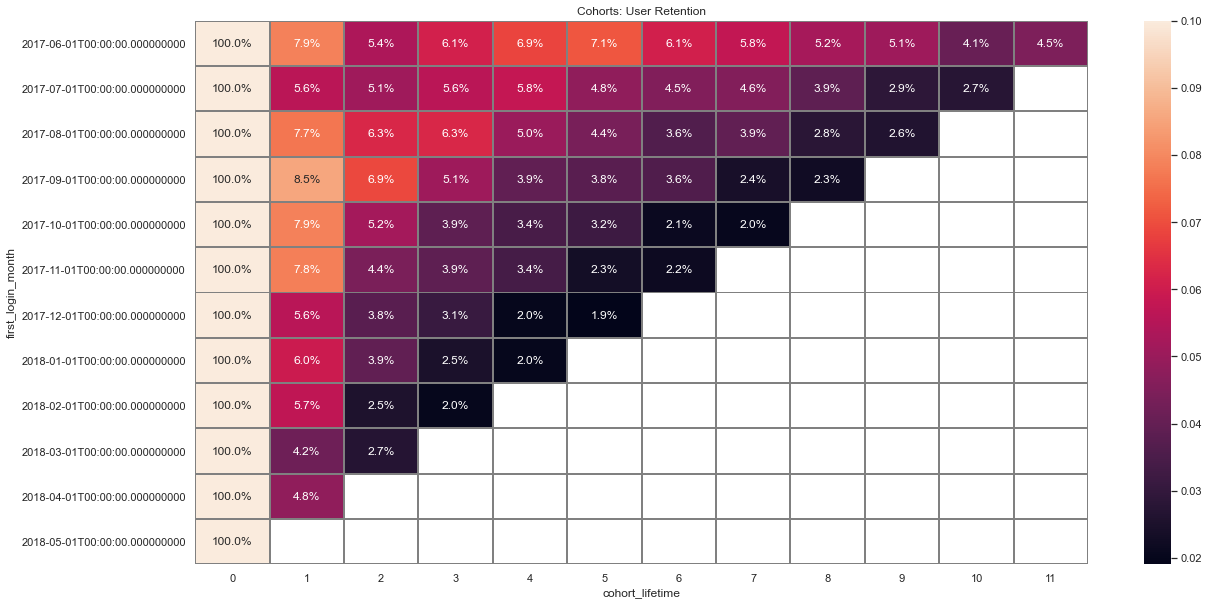

In [246]:
retention_pivot = cohorts.pivot_table(
    index='first_login_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)



sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', vmax= 0.10, linewidths=1, linecolor='gray'
);

Retention rates are extremely low, all below 8%! Users' first impression of the website/app doesn't seem to be good at all. Maybe they are forced to register in order to access the website or app, and most of them prefer not to, before having a first-hand experience. 
Their first period of life (in months), seems to hold the highest retention in all cohorts, but it drops over time. 

* Cohort 2017-06 has the highest retention rates.
* Cohort 2017-09 had the highest retention rate on first period of life, 8.5%, but it then dropped over time.


### 2.2 Sales<a class="anchor" id="section_2_2"></a>

**When do people start buying?**

In [247]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [248]:
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [249]:
first_session = visits.groupby('uid')['start_ts'].min().reset_index()
first_session.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [250]:
conversions = first_purchase.merge(first_session, on='uid')
conversions.head()

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [251]:
conversions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   uid       36523 non-null  uint64        
 1   buy_ts    36523 non-null  datetime64[ns]
 2   start_ts  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


In [252]:
conversions['buy_ts'] = conversions['buy_ts'].dt.date

In [253]:
conversions['start_ts'] = conversions['start_ts'].dt.date

Conversions df contains only data from users who have purchased something.

In [254]:
#Calculating Conversion Time
conversions['conversion_time'] = pd.to_timedelta(conversions['buy_ts'] - conversions['start_ts']).dt.days
conversions.head()

,uid,buy_ts,start_ts,conversion_time
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0


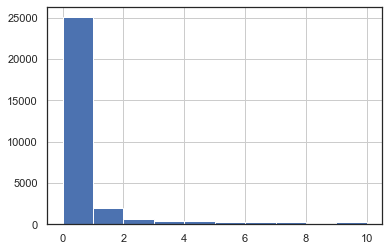

In [255]:
conversions['conversion_time'].hist(bins=10, range=(0, 10));

In [256]:
conversions.describe()

,uid,conversion_time
count,3.652300e+04,36523.000000
mean,9.213152e+18,16.895901
std,5.324792e+18,47.071200
min,3.135781e+14,0.000000
25%,4.615081e+18,0.000000
50%,9.245161e+18,0.000000
75%,1.383709e+19,2.000000
max,1.844617e+19,363.000000


75% of conversions take place within 2 days from users' first visit. This is a good rate! Since we sell tickets, users probable make up their mind fast, as the show might be within a few days and users want to secure their seats.

We have a few outliers that reach over 100 days, which could be due to users having a look at first, and whenever an interesting show came up, they'd purchase. 

We now have a column holding the number of days each customer took to convert.
Let's group the data by source Id, and find which marketing channels have the shortest conversion time.

In [257]:
#Extract Uid and Source Id columns from visits df.
source_id = visits.pivot_table(index='uid', values='source_id').reset_index()
source_id['source_id'] = source_id['source_id'].astype('int')

In [258]:
#Merge the previous dataframe with conversions
conversions_by_source = conversions.merge(source_id, on='uid')
conversions_by_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   uid              36523 non-null  uint64
 1   buy_ts           36523 non-null  object
 2   start_ts         36523 non-null  object
 3   conversion_time  36523 non-null  int64 
 4   source_id        36523 non-null  int32 
dtypes: int32(1), int64(1), object(2), uint64(1)
memory usage: 1.5+ MB


In [259]:
conversions_by_source

,uid,buy_ts,start_ts,conversion_time,source_id
0,313578113262317,2018-01-03,2017-09-18,107,2
1,1575281904278712,2017-06-03,2017-06-03,0,10
2,2429014661409475,2017-10-11,2017-10-11,0,3
3,2464366381792757,2018-01-28,2018-01-27,1,5
4,2551852515556206,2017-11-24,2017-11-24,0,5
...,...,...,...,...,...
36518,18445147675727495770,2017-11-24,2017-08-20,96,5
36519,18445407535914413204,2017-09-22,2017-09-22,0,2
36520,18445601152732270159,2018-03-26,2017-08-07,231,2
36521,18446156210226471712,2018-02-18,2017-11-07,103,2


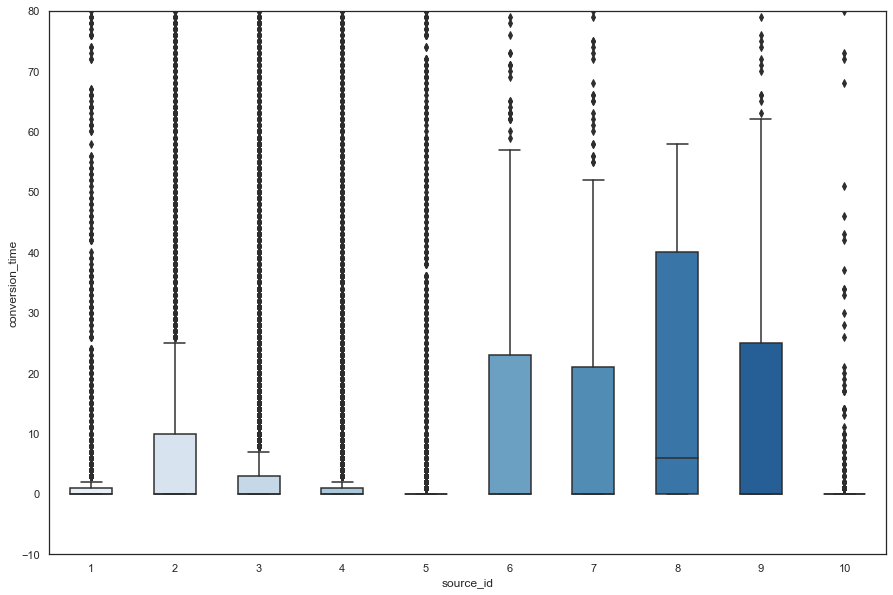

<Figure size 1440x720 with 0 Axes>

In [260]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x=conversions_by_source["source_id"], y=conversions_by_source["conversion_time"], palette="Blues", width=0.5, ax=ax);
plt.ylim(-10, 80);
plt.figure(figsize=(20,10));


**Conclusion**

We have pulled the conversion time per user by merging the Orders and Visits df, and calculating the difference between their first purchase and their first session.

Then, we had a visualization of conversion time per source. 

As we mentioned earlier, we need to keep in mind that 75% of users convert within 2 days from their registration. This explains why some sources' boxplots are 0 -without taking into account their outliers. 

* The Source Id with the greatest amount of "fast conversions" are 10 and 5, followed by 1 and 4.
* Sources with more varied conversion times are 8, 9, 6 and 7.  Even though their medians are low, there is still a considerable amount of users that take over 10 days to convert. 

**How many orders do they make during a given period of time?**

We will calculate the number of orders per:
* Cohort
* Source Id

In [261]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


*NUMBER OF ORDERS PER COHORT*

In [262]:
visits_cohorts= visits.filter(['first_login_month', 'uid'],axis=1)
visits_cohorts = visits_cohorts.drop_duplicates()
visits_cohorts

,first_login_month,uid
0,2017-12-01,16879256277535980062
1,2018-02-01,104060357244891740
2,2017-07-01,7459035603376831527
3,2018-03-01,16174680259334210214
4,2017-12-01,9969694820036681168
...,...,...
358517,2018-04-01,12734910664455613822
358522,2017-11-01,6761309174945977743
358525,2017-07-01,11102751930812818282
358527,2018-03-01,272012551460639309


In [263]:
cohort_orders = orders.merge(visits_cohorts, on='uid')
cohort_orders

,buy_ts,revenue,uid,first_login_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-01


In [264]:
cohort_orders_pivot = cohort_orders.pivot_table(index='first_login_month', values='buy_ts', aggfunc='count')
cohort_orders_pivot.sort_values(by='buy_ts', ascending=False)

,buy_ts
first_login_month,
2017-06-01,6397
2017-10-01,6233
2017-11-01,5983
2017-12-01,5236
2017-09-01,4346
2018-02-01,3866
2018-01-01,3864
2017-07-01,3545
2018-03-01,3545


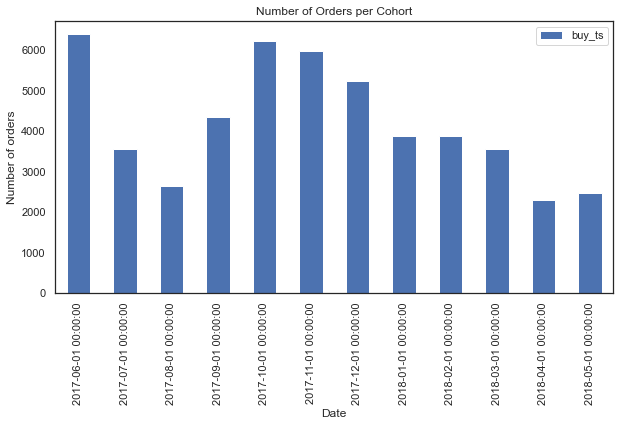

In [265]:
cohort_orders_pivot.plot(kind='bar', figsize=(10,5));
plt.xlabel('Date')
plt.ylabel('Number of orders')
plt.title('Number of Orders per Cohort')
plt.show()

* The cohort with the biggest amount of orders is June 2017, followed closely by October and November 2017.
* Those with the least amound of orders are April and May 2018.

*NUMBER OF ORDERS PER SOURCE*

In [266]:
visits_source= visits.filter(['source_id', 'uid'],axis=1)
visits_source = visits_source.drop_duplicates()
visits_source

,source_id,uid
0,4,16879256277535980062
1,2,104060357244891740
2,5,7459035603376831527
3,9,16174680259334210214
4,3,9969694820036681168
...,...,...
358525,3,11102751930812818282
358526,3,1321491773734693040
358527,4,272012551460639309
358530,5,3266363999948772866


In [267]:
source_orders = orders.merge(visits_source, on='uid')
source_orders

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3
...,...,...,...,...
100149,2018-05-31 23:54:00,0.30,1786462140797698849,3
100150,2018-05-31 23:56:00,3.67,3993697860786194247,4
100151,2018-05-31 23:56:00,3.67,3993697860786194247,5
100152,2018-05-31 23:56:00,3.67,3993697860786194247,3


In [268]:
source_orders_pivot = source_orders.pivot_table(index='source_id', values='buy_ts', aggfunc='count')
source_orders_pivot.sort_values('buy_ts')

,buy_ts
source_id,
7,1
10,2437
9,4713
1,15308
2,15644
5,17630
3,21926
4,22495


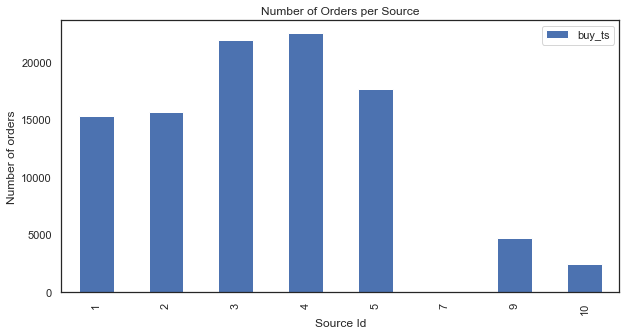

In [269]:
source_orders_pivot.plot(kind='bar', figsize=(10,5));
plt.xlabel('Source Id')
plt.ylabel('Number of orders')
plt.title('Number of Orders per Source')
plt.show()

* The source id which brought more orders is 4, followed very closely by 3. 
* The source with the least amount of orders is 7: with only 1 order! 

**What is the average purchase size?**

*AVERAGE PURCHASE SIZE PER COHORT*

In [270]:
cohort_orders.head()

,buy_ts,revenue,uid,first_login_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [271]:
cohort_purchase_pivot = cohort_orders.pivot_table(index='first_login_month', values='revenue')
cohort_purchase_pivot.sort_values(by='revenue', ascending=False)

,revenue
first_login_month,
2017-09-01,7.750244
2017-06-01,6.257003
2017-12-01,5.950697
2017-08-01,5.103059
2017-07-01,5.024573
2017-10-01,4.469387
2018-04-01,4.324967
2018-05-01,4.187134
2017-11-01,4.082688


The average purchase amount per cohort is displayed in the table above.
* Most cohorts provide less than 7 on average
* The cohort with highest revenue is September 2017
* Cohort with lowest revenue is February 2018

*AVERAGE PURCHASE SIZE PER SOURCE*

In [272]:
source_purchase_pivot = source_orders.pivot_table(index='source_id', values='revenue')
source_purchase_pivot.sort_values(by='revenue', ascending=False)

,revenue
source_id,
2,7.256744
1,6.639102
5,6.326299
3,5.436171
4,5.330050
9,3.991021
10,3.372474
7,1.220000


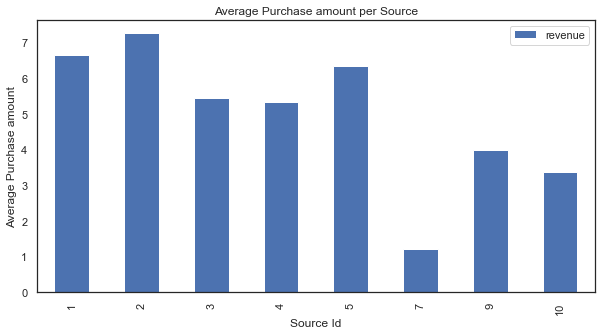

In [273]:
source_purchase_pivot.plot(kind='bar', figsize=(10,5));
plt.xlabel('Source Id')
plt.ylabel('Average Purchase amount')
plt.title('Average Purchase amount per Source')
plt.show()

* The source that on average has brought most revenue is 2, followed closely by 1 and 5
* The source with the least average revenue is 7.

**How much money do they bring? (LTV)**

In [274]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [275]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [276]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [277]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

In [278]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [279]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [280]:
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                36523 non-null  uint64        
 1   first_order_month  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [281]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [282]:
orders_ = pd.merge(orders,first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [283]:
report['gp'] = report['revenue']
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [284]:
report['ltv'] = (report['gp'] / report['n_buyers']).round(2)

In [285]:
output = report.pivot_table(index='first_order_month', columns='age', values='ltv')
output=output.cumsum(axis=1)

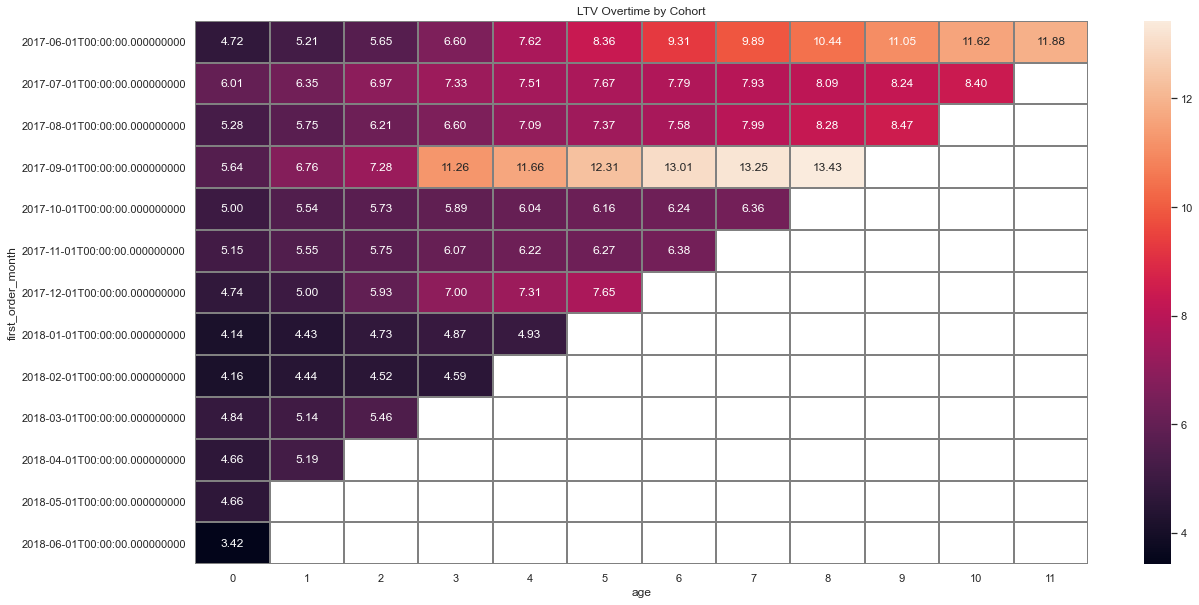

In [286]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('LTV Overtime by Cohort')
sns.heatmap(
    output, annot=True, fmt='.2f', linewidths=1, linecolor='gray'
);

Disclaimer: LTV is calculated without margin rate.

* Cohort with the highest LTV growth is September 2017; within 9 periods of age it almost triples its value (from 5.64 to 13.43).
* The other cohorts show a quite stable LTV over time.
* Cohort with lowest cumulative LTV is January 2018.
* Those cohorts which belong to periods taking place after November 2017 have the lowest LTV.


*LTV by Source*

In [287]:
#Revenue per source
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [288]:
#Number of users per source
source_sizes = visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_users']
source_sizes

,source_id,n_users
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [289]:
source_purchase_pivot = source_orders.pivot_table(index='source_id', values='revenue', aggfunc='sum').reset_index()
source_purchase_pivot

,source_id,revenue
0,1,101631.38
1,2,113524.51
2,3,119193.48
3,4,119899.47
4,5,111532.65
5,7,1.22
6,9,18809.68
7,10,8218.72


In [290]:
source_ltv = pd.merge(source_sizes, source_purchase_pivot, on='source_id')
source_ltv

,source_id,n_users,revenue
0,1,18999,101631.38
1,2,26245,113524.51
2,3,74756,119193.48
3,4,83525,119899.47
4,5,56974,111532.65
5,7,34,1.22
6,9,9264,18809.68
7,10,8067,8218.72


In [291]:
source_ltv['ltv']= (source_ltv['revenue'] / source_ltv['n_users']).round(2)
source_ltv

,source_id,n_users,revenue,ltv
0,1,18999,101631.38,5.35
1,2,26245,113524.51,4.33
2,3,74756,119193.48,1.59
3,4,83525,119899.47,1.44
4,5,56974,111532.65,1.96
5,7,34,1.22,0.04
6,9,9264,18809.68,2.03
7,10,8067,8218.72,1.02


* Highest LTV is from source 1 and 2, whereas lowest is from 7.
* sources 2,3,4,5 attracht the biggest amount of users to the website, but the ltv is not as high.
* Sources 7, 9 and 10 have the lowest LTV...perhaps a chance to rething their efficiency?

### 2.3 Marketing <a class="anchor" id="section_2_3"></a>

**How much money was spent? Overall/per source/over time**

In [292]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [293]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [294]:
total_costs = costs['costs'].sum()
print('Total Costs: {}'.format(total_costs))

Total Costs: 329131.62


In [295]:
monthly_costs = costs.pivot_table(index='month', values='costs')
monthly_costs = monthly_costs.sort_values(by='costs', ascending=False)
monthly_costs

,costs
month,
2017-11-01,180.513714
2017-12-01,176.568433
2017-10-01,167.386544
2018-02-01,166.954235
2018-01-01,154.463226
2018-03-01,144.148199
2017-09-01,116.042429
2018-04-01,109.799901
2018-05-01,102.415991


* Minimum cost amount is 0.54
* Maximum cost amount is 1788.28
* Average cost is 129.5
* 75% of costs are 170 or less

* Month with highest costs is November 2017 and December 2017: The marketing department was investing in their channels to promote tickets for black friday and upcoming holidays.
* Month with lowest costs is August 2018 (and other months in the summer season), as users are away on vacation and not looking for tickets.


In [296]:
#Costs per source
costs_source=costs.groupby('source_id')['costs'].sum()
costs_source.sort_values(ascending=False).reset_index()

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


The most expensive Source is 3, and the least are 9 and 10.

In [297]:
costs['dt'] = costs['dt'].astype('datetime64[M]')

In [298]:
costs_overtime = costs.pivot_table(index='source_id', columns='dt', values='costs', aggfunc='sum').reset_index()


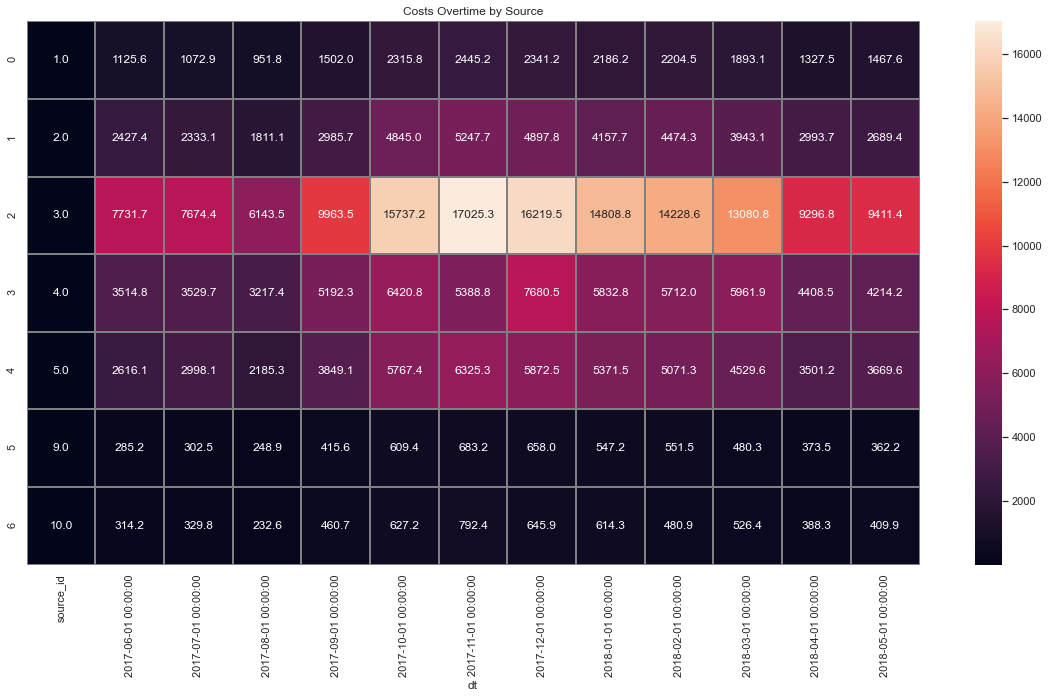

In [299]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Costs Overtime by Source')
sns.heatmap(
    costs_overtime, annot=True, fmt='.1f', linewidths=1, linecolor='gray'
);

Sources that stand out:
* 3: holds the highest costs from all; with particularly higher peaks between November 2017 and March 2018.
* 9 and 10: lowest costs
* in all sources, the highest month is November 2017 - probably because holidays, black friday, cyber monday are around the corner, so Marketing investments are higher. 
* Month with lowest expenses on every source is August 2017, as people tend to be away for Summer vacation and more disconnected from computer/phones.

**How much did customer acquisition from each of the sources cost?**

*CAC BY SOURCE*

In [300]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-01,62.25,2017-06-01
2,1,2017-06-01,36.53,2017-06-01
3,1,2017-06-01,55.00,2017-06-01
4,1,2017-06-01,57.08,2017-06-01


In [301]:
source_costs = costs.groupby('source_id')['costs'].sum() # calculate source_id costs

In [302]:
source_costs.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [303]:
source_ltv

,source_id,n_users,revenue,ltv
0,1,18999,101631.38,5.35
1,2,26245,113524.51,4.33
2,3,74756,119193.48,1.59
3,4,83525,119899.47,1.44
4,5,56974,111532.65,1.96
5,7,34,1.22,0.04
6,9,9264,18809.68,2.03
7,10,8067,8218.72,1.02


In [304]:
source_metrics = pd.merge(source_costs, source_ltv, on='source_id')
source_metrics

,source_id,costs,n_users,revenue,ltv
0,1,20833.27,18999,101631.38,5.35
1,2,42806.04,26245,113524.51,4.33
2,3,141321.63,74756,119193.48,1.59
3,4,61073.60,83525,119899.47,1.44
4,5,51757.10,56974,111532.65,1.96
5,9,5517.49,9264,18809.68,2.03
6,10,5822.49,8067,8218.72,1.02


In [305]:
source_metrics['cac'] = (source_metrics['costs'] / source_metrics['n_users']).round(2)
source_metrics

,source_id,costs,n_users,revenue,ltv,cac
0,1,20833.27,18999,101631.38,5.35,1.10
1,2,42806.04,26245,113524.51,4.33,1.63
2,3,141321.63,74756,119193.48,1.59,1.89
3,4,61073.60,83525,119899.47,1.44,0.73
4,5,51757.10,56974,111532.65,1.96,0.91
5,9,5517.49,9264,18809.68,2.03,0.60
6,10,5822.49,8067,8218.72,1.02,0.72


It seems that by source, the marketing team has been able to keep the LTV > CAC, which is great news!

*CAC BY COHORT*

In [306]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [307]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.72
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.49
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.44
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.95
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.02


In [308]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.72,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.49,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.44,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.95,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.02,2017-06-01,18015.0,8.905091


In [309]:
cohort_metrics = report_.groupby('first_order_month')['ltv', 'cac'].mean()

<ipython-input-309-88f29ee466aa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cohort_metrics = report_.groupby('first_order_month')['ltv', 'cac'].mean()


In [310]:
cohort_metrics

,ltv,cac
first_order_month,,
2017-06-01,0.990000,8.905091
2017-07-01,0.763636,9.485486
2017-08-01,0.847000,10.796015
2017-09-01,1.492222,9.441654
2017-10-01,0.795000,8.369327
2017-11-01,0.911429,9.288870
2017-12-01,1.275000,8.741809
2018-01-01,0.986000,9.937302
2018-02-01,1.147500,8.962758


Table above shows the mean LTV and CAC values per cohort, based on first_order_month.

Contrary to the sources, here, LTV< CAC in every cohort. This means that the users are not generating enough revenue to cover the costs it takes to attract them. 

Let's calculate ROMI to analyze this more in depth.

In [311]:
# the reviewer's code
cohort_metrics.reset_index().merge(
    output.cumsum(axis=1).mean(axis=1).to_frame().reset_index()).rename(columns={0: 'mean_cumm_LTV'})

,first_order_month,ltv,cac,mean_cumm_LTV
0,2017-06-01,0.990000,8.905091,47.055833
1,2017-07-01,0.763636,9.485486,42.671818
2,2017-08-01,0.847000,10.796015,35.914000
3,2017-09-01,1.492222,9.441654,45.540000
4,2017-10-01,0.795000,8.369327,25.511250
5,2017-11-01,0.911429,9.288870,22.851429
6,2017-12-01,1.275000,8.741809,20.071667
7,2018-01-01,0.986000,9.937302,13.456000
8,2018-02-01,1.147500,8.962758,10.897500
9,2018-03-01,1.820000,8.608907,10.086667


**How worthwhile where the investments? (ROI)**

In [312]:
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.72,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.49,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.44,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.95,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.02,2017-06-01,18015.0,8.905091


In [313]:
report_['romi'] = report_['ltv'] / report_['cac']  # calculate ROMI

output = report_.pivot_table(index='first_order_month',
                            columns='age',
                            values='romi',
                            aggfunc='mean')  # form a new pivot table

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.3,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.89,
2017-08-01,0.49,0.53,0.58,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.88,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.5,0.5,0.51,,,,,,,,


Only 2 cohorts have paid off:
* 09-2017 Cohort, paid off in the 4th month (ROMI = 1.19)
* 06-2017 cohort, paid off on the 7th month (ROMI = 1.05)

All the others are not giving any return on investment.

In [314]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540788
1     0.582061
2     0.631207
3     0.719778
4     0.782841
5     0.859997
6     0.896532
7     0.969995
8     1.053654
9     0.964703
10    1.095217
11    1.334068
dtype: float64

On average, cohorts pay off at the end of the 9th month.

## Conclusion

Sessions:
* Sessions per day and Active users per Day (DAU) have almost equal dynamics over time.
* November is the highest peak due to Black Friday, followed by December, for Christmas Holidays
* August (and other summer months) has the lowest amount of sessions, as people are on summer vacation and "disconnected".
* Average session length is 10min 43 seconds
* 50% of sessions are 5 minutes or less, and 75% are below 15 minutes. 

Retention:
* Retention rates for each cohort are below 8%.
* Users' first impression of the website/app seems to be good enough to register and buy once, and that's about it.
* Cohort 2017-06 has the highest retention rates.
* Cohort 2017-09 had the highest retention rate on first period of life, 8.5%, but it then dropped over time.

Conversion:
* By cohort:
    * 75% of conversions take place within 2 days from users' first visit. This is a good rate! Since we sell tickets, users probable make up their mind fast, as the show might be within a few days and users want to secure their seats.
* By source: 

We have also calculated the Source Id metrics
* Highest LTV is from source 1 and 2, whereas lowest is from 7.
* sources 2,3,4,5 attracht the biggest amount of users to the website, but the ltv is not as high.
* Sources 7, 9 and 10 have the lowest LTV...perhaps a chance to rething their efficiency?